Import some basic librairies:

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

## Q

Load again the data from file ../data/happiness_long.csv and, as a warm-up, draw boxplots by region and year.

Hint: to print the *x* labels with 45° rotation, get the object returned by the function for box plots (let us name it `ax`) and call:
```python
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right')
```

## A

In [2]:
df = pd.read_csv('../data/happiness_long.csv')

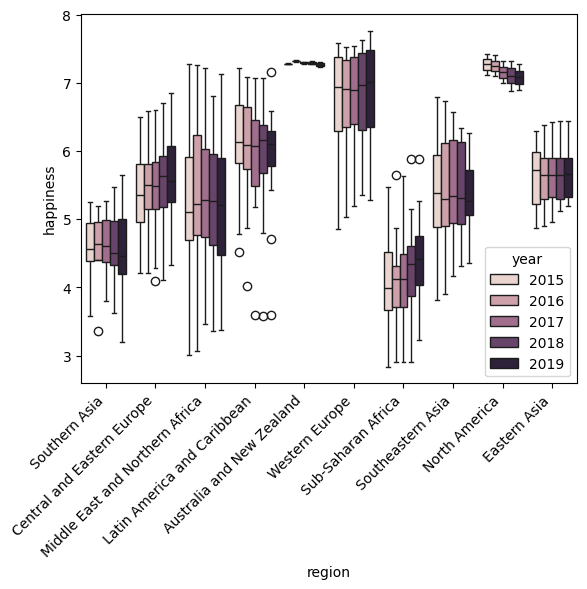

In [3]:
ax = sns.boxplot(df, x='region', y='happiness', hue='year')
ax.set_xticks(ax.get_xticks(), ax.get_xticklabels(), rotation=45, ha='right');

## Q

Let us start simple and fit a linear model of *happiness* as dependent variable, and *year* and *region* as independent variables.

Treat *year* as a categorical variable.

Print summary tables for the fitted model.

## A

In [4]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

first_model = smf.ols('happiness ~ C(year) + region', df).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     85.91
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          9.83e-136
Time:                        15:18:35   Log-Likelihood:                -759.36
No. Observations:                 720   AIC:                             1547.
Df Residuals:                     706   BIC:                             1611.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     7.2719      0.228     31.904      0.000       6.824       7.719
C(year)[T.2016]                              -0.0054      0.083     -0.065      0.948      -0.168       0.157
C(year)[T.2017]                               0.0049      0.083      0.060      0.952      -0.157       0.167
C(year)[T.2018]                               0.0355      0.083      0.429      0.668      -0.127       0.198
C(year)[T.2019]                               0.0786      0.083      0.951      0.342      -0.084       0.241
region[T.Central and Eastern Europe]         -1.8570      0.230     -8.086      0.000      -2.308      -1.406
region[T.Eastern Asia]                       -1.6430      0.256     -6.414      0.000      -2.146      -1.140
region[T.Latin America and Caribbean]        -1.2832      0.232     -5.527      0.000      -1.739      -0.827
region[T.Middle East and Northern Africa]    -2.0524      0.234     -8.776      0.000      -2.512      -1.593
region[T.North America]                      -0.1199      0.314     -0.382      0.702      -0.736       0.496
region[T.Southeastern Asia]                  -1.9051      0.248     -7.681      0.000      -2.392      -1.418
region[T.Southern Asia]                      -2.7139      0.252    -10.789      0.000      -3.208      -2.220
region[T.Sub-Saharan Africa]                 -3.1037      0.229    -13.559      0.000      -3.553      -2.654
region[T.Western Europe]                     -0.5540      0.232     -2.386      0.017      -1.010      -0.098
==============================================================================
Omnibus:                       28.123   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.064
Skew:                          -0.422   Prob(JB):                     6.61e-08
Kurtosis:                       3.624   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q

Carry out an ANOVA for the model and print a table with columns including degrees of freedom, sums of squares, *F* statistics and *p*-values..

Try again with interaction.

## A

In [5]:
sm.stats.anova_lm(first_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(year),4.0,0.706667,0.176667,0.358946,8.378521e-01
region,9.0,548.985239,60.998360,123.934724,6.644456e-139
Residual,706.0,347.480032,0.492181,NaN,NaN


In [6]:
simple_model_with_interaction = smf.ols('happiness ~ C(year) * region', df).fit()
sm.stats.anova_lm(simple_model_with_interaction, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,106.142450,1.0,206.802018,4.606674e-41
C(year),0.003385,4.0,0.001649,9.999946e-01
region,116.787658,9.0,25.282505,1.483314e-37
C(year):region,3.598275,36.0,0.194741,1.000000e+00
Residual,343.881758,670.0,NaN,NaN


## Q

Perform pairwise *t* tests between regions. Print a table that includes *t* statistics, uncorrected and corrected *p*-values.

After using the default correction for multiple comparisons, try also Bonferroni.

## A

In [7]:
first_model.t_test_pairwise('region').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Central and Eastern Europe-Australia and New Zealand,-1.856957,0.229638,-8.086446,2.673560e-15,-2.307813,-1.406102,7.485967e-14,True
Eastern Asia-Australia and New Zealand,-1.643033,0.256172,-6.413786,2.599316e-10,-2.145984,-1.140083,5.198631e-09,True
Latin America and Caribbean-Australia and New Zealand,-1.283190,0.232176,-5.526807,4.591153e-08,-1.739028,-0.827353,7.345842e-07,True
Middle East and Northern Africa-Australia and New Zealand,-2.052400,0.233852,-8.776486,1.260164e-17,-2.511529,-1.593271,3.780493e-16,True
North America-Australia and New Zealand,-0.119900,0.313746,-0.382157,7.024600e-01,-0.735886,0.496086,9.111157e-01,False
Southeastern Asia-Australia and New Zealand,-1.905125,0.248038,-7.680790,5.289571e-14,-2.392105,-1.418145,1.428184e-12,True
Southern Asia-Australia and New Zealand,-2.713943,0.251556,-10.788620,3.184912e-25,-3.207830,-2.220055,1.146568e-23,True
Sub-Saharan Africa-Australia and New Zealand,-3.103665,0.228896,-13.559263,2.168150e-37,-3.553063,-2.654266,8.455784e-36,True
Western Europe-Australia and New Zealand,-0.554010,0.232176,-2.386165,1.728767e-02,-1.009847,-0.098172,1.302163e-01,False
Eastern Asia-Central and Eastern Europe,0.213924,0.141144,1.515642,1.300574e-01,-0.063188,0.491036,4.793104e-01,False


In [8]:
first_model.t_test_pairwise('region', method='Bonferroni').result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-Bonferroni,reject-Bonferroni
Central and Eastern Europe-Australia and New Zealand,-1.856957,0.229638,-8.086446,2.673560e-15,-2.307813,-1.406102,1.203102e-13,True
Eastern Asia-Australia and New Zealand,-1.643033,0.256172,-6.413786,2.599316e-10,-2.145984,-1.140083,1.169692e-08,True
Latin America and Caribbean-Australia and New Zealand,-1.283190,0.232176,-5.526807,4.591153e-08,-1.739028,-0.827353,2.066019e-06,True
Middle East and Northern Africa-Australia and New Zealand,-2.052400,0.233852,-8.776486,1.260164e-17,-2.511529,-1.593271,5.670739e-16,True
North America-Australia and New Zealand,-0.119900,0.313746,-0.382157,7.024600e-01,-0.735886,0.496086,1.000000e+00,False
Southeastern Asia-Australia and New Zealand,-1.905125,0.248038,-7.680790,5.289571e-14,-2.392105,-1.418145,2.380307e-12,True
Southern Asia-Australia and New Zealand,-2.713943,0.251556,-10.788620,3.184912e-25,-3.207830,-2.220055,1.433211e-23,True
Sub-Saharan Africa-Australia and New Zealand,-3.103665,0.228896,-13.559263,2.168150e-37,-3.553063,-2.654266,9.756674e-36,True
Western Europe-Australia and New Zealand,-0.554010,0.232176,-2.386165,1.728767e-02,-1.009847,-0.098172,7.779450e-01,False
Eastern Asia-Central and Eastern Europe,0.213924,0.141144,1.515642,1.300574e-01,-0.063188,0.491036,1.000000e+00,False


## Q

Fit another linear model, still with *happiness* as the variable to explain, and with all the other columns as indenpendent variables, without interactions.

Exclude *year*.

Print summary tables again and interpret the suitability of the model for the data.

## A

In [9]:
complex_model = smf.ols('happiness ~ gdp + health + generosity + social + corruption + region', df).fit()
complex_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          1.99e-223
Time:                        15:18:35   Log-Likelihood:                -549.34
No. Observations:                 720   AIC:                             1129.
Df Residuals:                     705   BIC:                             1197.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     3.3787      0.260     12.998      0.000       2.868       3.889
region[T.Central and Eastern Europe]         -0.6335      0.190     -3.332      0.001      -1.007      -0.260
region[T.Eastern Asia]                       -0.9834      0.201     -4.883      0.000      -1.379      -0.588
region[T.Latin America and Caribbean]         0.0092      0.190      0.049      0.961      -0.365       0.383
region[T.Middle East and Northern Africa]    -0.8566      0.191     -4.475      0.000      -1.232      -0.481
region[T.North America]                       0.0383      0.237      0.162      0.872      -0.427       0.503
region[T.Southeastern Asia]                  -0.6925      0.196     -3.536      0.000      -1.077      -0.308
region[T.Southern Asia]                      -0.7906      0.209     -3.783      0.000      -1.201      -0.380
region[T.Sub-Saharan Africa]                 -0.6445      0.211     -3.059      0.002      -1.058      -0.231
region[T.Western Europe]                     -0.2965      0.178     -1.668      0.096      -0.645       0.052
gdp                                           1.2525      0.095     13.157      0.000       1.066       1.439
health                                        1.2639      0.181      7.001      0.000       0.909       1.618
generosity                                    0.6419      0.195      3.298      0.001       0.260       1.024
social                                        0.3695      0.059      6.308      0.000       0.254       0.485
corruption                                    0.9785      0.225      4.350      0.000       0.537       1.420
==============================================================================
Omnibus:                       18.932   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.740
Skew:                          -0.385   Prob(JB):                     5.17e-05
Kurtosis:                       3.254   Cond. No.                         56.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Q

Draw a QQ plot and histogram of the model's residuals.

## A

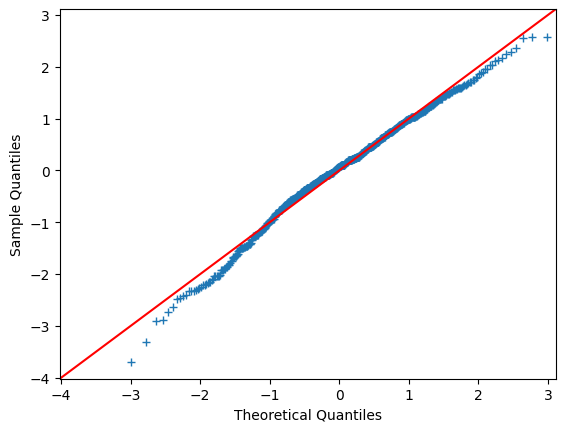

In [10]:
sm.graphics.qqplot(complex_model.resid, fit=True, line='45', fmt='b', marker='+');

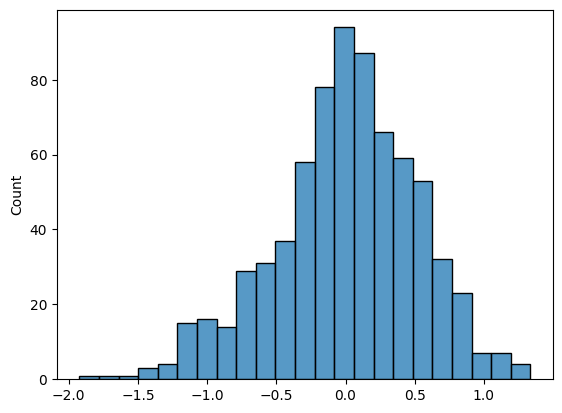

In [11]:
sns.histplot(complex_model.resid);

## Q

Draw KDE plots of the model's residuals, by region.

As a reference point, draw similar plots by year instead of region.


Hint: to move the legend out of the plotting area, get the object returned by the function for kde plots (let us name it `ax`) and call:
```python
ax.get_legend().set_bbox_to_anchor((1.04, 1))
```

## A

In [12]:
df_with_resid = df.copy()
df_with_resid['resid'] = complex_model.resid

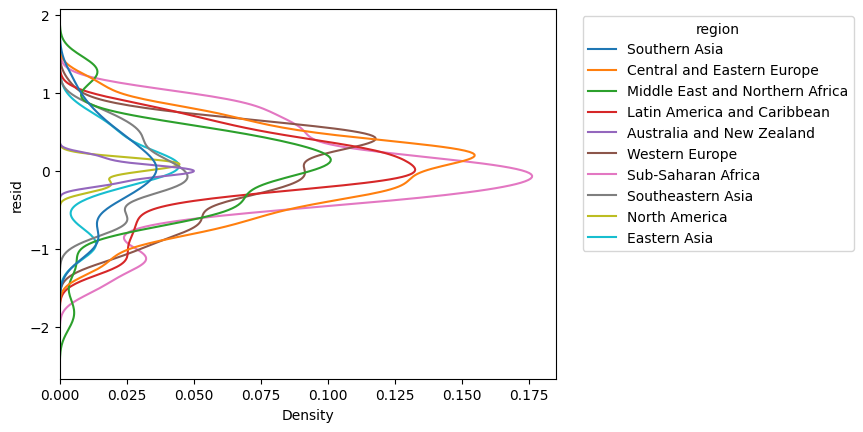

In [13]:
ax = sns.kdeplot(df_with_resid, y='resid', hue='region', bw_adjust=.75)
ax.get_legend().set_bbox_to_anchor((1.04, 1))

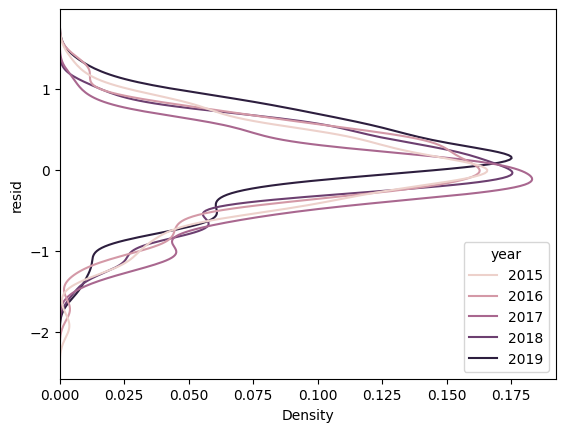

In [14]:
sns.kdeplot(df_with_resid, y='resid', hue='year', bw_adjust=.75);

Bonus: residuals *vs* predicted values, by region.

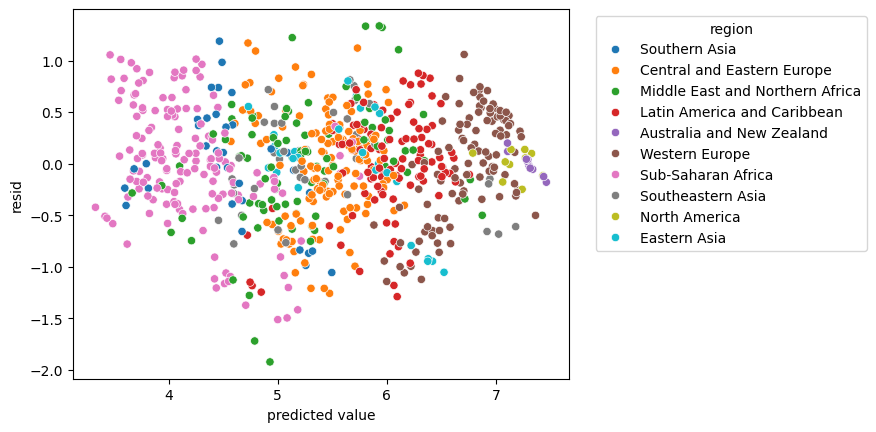

In [15]:
df_with_resid['predicted value'] = complex_model.fittedvalues
ax = sns.scatterplot(df_with_resid, x='predicted value', y='resid', hue='region')
ax.get_legend().set_bbox_to_anchor((1.04, 1))

## Q

Try other models with 2-factor interactions. Some interactions (or terms in the model) may not work.

## A

In [16]:
smf.ols('happiness ~ region * gdp + region * health + region * generosity + region * social + region * corruption', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     66.29
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          6.61e-238
Time:                        15:18:35   Log-Likelihood:                -404.14
No. Observations:                 720   AIC:                             928.3
Df Residuals:                     660   BIC:                             1203.
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Intercept                                                7.3178     19.161      0.382      0.703     -30.306      44.942
region[T.Central and Eastern Europe]                    -4.6417     19.166     -0.242      0.809     -42.275      32.992
region[T.Eastern Asia]                                  -4.8225     19.183     -0.251      0.802     -42.490      32.845
region[T.Latin America and Caribbean]                   -5.0437     19.165     -0.263      0.793     -42.676      32.588
region[T.Middle East and Northern Africa]               -6.0513     19.163     -0.316      0.752     -43.679      31.576
region[T.North America]                                 -0.7654     21.015     -0.036      0.971     -42.029      40.498
region[T.Southeastern Asia]                             -4.9210     19.168     -0.257      0.797     -42.558      32.716
region[T.Southern Asia]                                 -4.3031     19.165     -0.225      0.822     -41.934      33.328
region[T.Sub-Saharan Africa]                            -3.9204     19.162     -0.205      0.838     -41.546      33.705
region[T.Western Europe]                                -7.5937     19.197     -0.396      0.693     -45.289      30.102
gdp                                                      0.2475      7.305      0.034      0.973     -14.096      14.591
region[T.Central and Eastern Europe]:gdp                 1.0551      7.308      0.144      0.885     -13.294      15.405
region[T.Eastern Asia]:gdp                               1.9910      7.341      0.271      0.786     -12.423      16.405
region[T.Latin America and Caribbean]:gdp                1.1039      7.309      0.151      0.880     -13.249      15.456
region[T.Middle East and Northern Africa]:gdp            1.4677      7.308      0.201      0.841     -12.883      15.818
region[T.North America]:gdp                             -0.4067      8.061     -0.050      0.960     -16.235      15.422
region[T.Southeastern Asia]:gdp                          1.2500      7.313      0.171      0.864     -13.110      15.610
region[T.Southern Asia]:gdp                             -0.2833      7.321     -0.039      0.969     -14.659      14.093
region[T.Sub-Saharan Africa]:gdp                         0.7247      7.306      0.099      0.921     -13.622      15.071
region[T.Western Europe]:gdp                             1.0874      7.322      0.149      0.882     -13.290      15.465
health                                                  -0.4385      7.563     -0.058      0.954     -15.289      14.412
region[T.Central and Eastern Europe]:health              1.5921      7.579      0.210      0.834     -13.289      16.473
region[T.Eastern Asia]:health                            1

We cannot analyse the interaction between *region* and any other independent variable. *region* has too many levels and fragments the data too much for the model to even be numerically valid.

We can still try other interactions, but cannot fix the issue of not-normally distributed residuals.

In [17]:
smf.ols('happiness ~ region + gdp * social + gdp * generosity + gdp * corruption + gdp * health + social * generosity + social * corruption + social * health + generosity * corruption + generosity * health + corruption * health', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     117.4
Date:                Tue, 04 Nov 2025   Prob (F-statistic):          7.32e-226
Time:                        15:18:35   Log-Likelihood:                -517.56
No. Observations:                 720   AIC:                             1085.
Df Residuals:                     695   BIC:                             1200.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     4.2963      0.335     12.809      0.000       3.638       4.955
region[T.Central and Eastern Europe]         -0.4373      0.202     -2.164      0.031      -0.834      -0.041
region[T.Eastern Asia]                       -0.9012      0.210     -4.285      0.000      -1.314      -0.488
region[T.Latin America and Caribbean]         0.1993      0.203      0.981      0.327      -0.200       0.598
region[T.Middle East and Northern Africa]    -0.6913      0.206     -3.360      0.001      -1.095      -0.287
region[T.North America]                       0.0565      0.236      0.240      0.811      -0.406       0.519
region[T.Southeastern Asia]                  -0.5685      0.210     -2.706      0.007      -0.981      -0.156
region[T.Southern Asia]                      -0.6244      0.221     -2.830      0.005      -1.058      -0.191
region[T.Sub-Saharan Africa]                 -0.6433      0.218     -2.945      0.003      -1.072      -0.214
region[T.Western Europe]                     -0.2716      0.185     -1.465      0.144      -0.636       0.093
gdp                                           0.6117      0.328      1.866      0.062      -0.032       1.255
social                                        0.3335      0.204      1.637      0.102      -0.066       0.733
gdp:social                                   -0.2161      0.230     -0.940      0.347      -0.667       0.235
generosity                                   -0.6918      0.760     -0.910      0.363      -2.184       0.801
gdp:generosity                                0.2968      0.806      0.368      0.713      -1.285       1.878
corruption                                   -2.2097      0.974     -2.269      0.024      -4.122      -0.298
gdp:corruption                                0.1572      0.797      0.197      0.844      -1.407       1.722
health                                       -0.1509      0.548     -0.276      0.783      -1.226       0.925
gdp:health                                    1.1262      0.325      3.468      0.001       0.489       1.764
social:generosity                             0.8409      0.501      1.680      0.093      -0.142       1.824
social:corruption                             2.0051      0.609      3.290      0.001       0.809       3.202
social:health                                -0.1891      0.386     -0.490      0.625      -0.947       0.569
generosity:corruption                        -5.1776      1.874     -2.762      0.006      -8.857      -1.498
generosity:health                             1.2383      1.491      0.831      0.406      -1.689       4.165
corruption:health                             2.8250      1.525      1.852      0.064      -0.170       5.820
===

## Q

Extract the data for European countries and fit yet another linear model on these data, excluding the *year* and *region* variables and without interactions.

## A

In [18]:
df_Europe = df.query('region=="Central and Eastern Europe" or region=="Western Europe"')
df_Europe

,country,region,year,happiness,gdp,health,generosity,social,corruption
1,Albania,Central and Eastern Europe,2015,4.959,0.87867,0.81325,0.14272,0.80434,0.06413
4,Armenia,Central and Eastern Europe,2015,4.350,0.76821,0.72990,0.07855,0.77711,0.03900
6,Austria,Western Europe,2015,7.200,1.33723,0.89042,0.33088,1.29704,0.18676
7,Azerbaijan,Central and Eastern Europe,2015,5.212,1.02389,0.64045,0.07799,0.93793,0.16065
10,Belarus,Central and Eastern Europe,2015,5.813,1.03192,0.73608,0.11046,1.23289,0.19090
...,...,...,...,...,...,...,...,...,...
701,Tajikistan,Central and Eastern Europe,2019,5.467,0.49300,0.71800,0.23000,0.38900,0.14400
708,Turkmenistan,Central and Eastern Europe,2019,5.247,1.05200,0.65700,0.24400,0.39400,0.02800
710,Ukraine,Central and Eastern Europe,2019,4.332,0.82000,0.73900,0.18700,0.17800,0.01000
711,United Kingdom,Western Europe,2019,7.054,1.33300,0.99600,0.34800,0.45000,0.27800


In [19]:
model_Europe = smf.ols('happiness ~ gdp + social + generosity + corruption + health', df_Europe).fit()
model_Europe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     146.6
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.04e-70
Time:                        15:18:36   Log-Likelihood:                -156.72
No. Observations:                 245   AIC:                             325.4
Df Residuals:                     239   BIC:                             346.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1964      0.212     10.350      0.000       1.778       2.614
gdp            1.1992      0.174      6.879      0.000       0.856       1.543
social         0.3255      0.086      3.775      0.000       0.156       0.495
generosity     1.7137      0.288      5.955      0.000       1.147       2.281
corruption     2.2810      0.288      7.917      0.000       1.713       2.849
health         1.7780      0.312      5.692      0.000       1.163       2.393
==============================================================================
Omnibus:                        0.227   Durbin-Watson:                   2.145
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.360
Skew:                          -0.047   Prob(JB):                        0.835
Kurtosis:                       2.838   Cond. No.                         26.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can introduce interactions. We cannot introduce all the interactions, though, not even most of the 2-factor interactions, otherwise the inference would fail with improper matrix conditionning. Some interactions do have a significant effet (*e.g.*  *generosity* \* *corruption*).

## Q

Carry out an ANOVA and print the corresponding table.

## A

In [20]:
sm.stats.anova_lm(model_Europe, typ=2)

,sum_sq,df,F,PR(>F)
gdp,10.207750,1.0,47.317709,5.244634e-11
social,3.074517,1.0,14.251828,2.017963e-04
generosity,7.650895,1.0,35.465487,9.214938e-09
corruption,13.521518,1.0,62.678576,9.117247e-14
health,6.989963,1.0,32.401754,3.657944e-08
Residual,51.558970,239.0,NaN,NaN


## Q

Let us get the raw data again, select the countries in a region, introduce an outlier and fit a linear model:

In [21]:
df_with_outlier = pd.read_csv('../data/happiness_long.csv').query('region=="Western Europe"')
df_with_outlier.loc[364, 'happiness'] = 5.0

In [22]:
import statsmodels.formula.api as smf
model_with_outlier = smf.ols('happiness ~ gdp + social + generosity + corruption + health', df_with_outlier).fit()

Plot the Cook's distance for the data and the model, and guess what the outliers are.

## A

In [23]:
model_with_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     53.19
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.54e-26
Time:                        15:18:36   Log-Likelihood:                -52.748
No. Observations:                 105   AIC:                             117.5
Df Residuals:                      99   BIC:                             133.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9507      1.098      0.866      0.389      -1.228       3.130
gdp            0.5806      0.468      1.242      0.217      -0.347       1.508
social         0.4281      0.140      3.056      0.003       0.150       0.706
generosity     1.6975      0.364      4.667      0.000       0.976       2.419
corruption     3.4996      0.409      8.552      0.000       2.688       4.312
health         3.6362      0.750      4.848      0.000       2.148       5.124
==============================================================================
Omnibus:                       54.387   Durbin-Watson:                   2.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.064
Skew:                          -1.536   Prob(JB):                     5.78e-72
Kurtosis:                      11.096   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

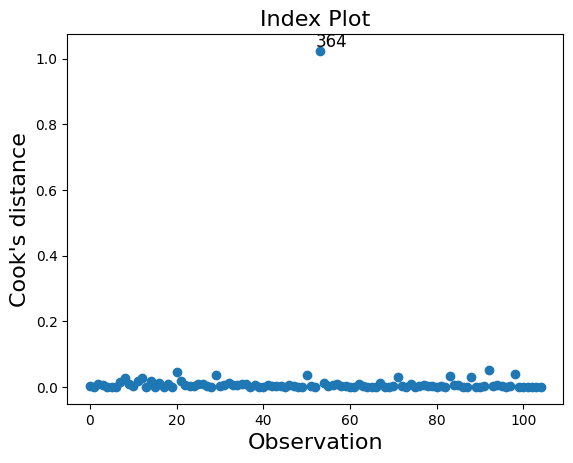

In [24]:
from statsmodels.stats.outliers_influence import OLSInfluence

diagnostics = OLSInfluence(model_with_outlier)
diagnostics.plot_index(threshold=0.8);

In [25]:
df_with_outlier.loc[364]

country           Luxembourg
region        Western Europe
year                    2017
happiness                5.0
gdp                 1.741944
health              0.845089
generosity          0.283181
social              1.457584
corruption          0.318834
Name: 364, dtype: object

## Q

What can we do with these outliers?

## A

The quality of the identified data point was compromised. We can only remove it.

In [26]:
df_without_outlier = df_with_outlier.drop(index=364)
model_without_outlier = smf.ols('happiness ~ gdp + social + generosity + corruption + health', df_without_outlier).fit()
model_without_outlier.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              happiness   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     87.13
Date:                Tue, 04 Nov 2025   Prob (F-statistic):           1.71e-34
Time:                        15:18:36   Log-Likelihood:                -29.874
No. Observations:                 104   AIC:                             71.75
Df Residuals:                      98   BIC:                             87.61
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7933      0.917     -0.865      0.389      -2.613       1.027
gdp            1.6529      0.404      4.088      0.000       0.850       2.455
social         0.5110      0.114      4.499      0.000       0.286       0.736
generosity     1.5182      0.294      5.156      0.000       0.934       2.102
corruption     3.1246      0.334      9.355      0.000       2.462       3.787
health         4.0135      0.607      6.610      0.000       2.809       5.218
==============================================================================
Omnibus:                        0.906   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.636   Jarque-Bera (JB):                0.544
Skew:                           0.159   Prob(JB):                        0.762
Kurtosis:                       3.156   Cond. No.                         77.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

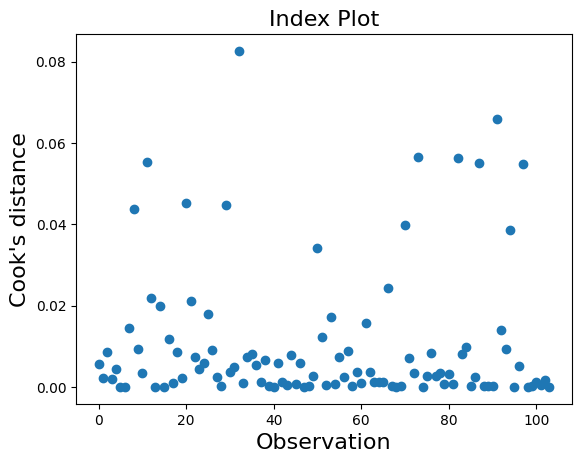

In [27]:
second_diagnostics = OLSInfluence(model_without_outlier)
second_diagnostics.plot_index(threshold=0.8);